# Generación de observaciones aleatorias a partir de una distribución de probabilidad

La primera etapa de la simulación es la **generación de números aleatorios**. Los números aleatorios sirven como el bloque de construcción de la simulación. La segunda etapa de la simulación es la **generación de variables aleatorias basadas en números aleatorios**. Esto incluye generar variables aleatorias <font color ='red'> discretas y continuas de distribuciones conocidas </font>. En esta clase, estudiaremos técnicas para generar variables aleatorias.

Intetaremos dar respuesta a el siguiente interrogante:
>Dada una secuencia de números aleatorios, ¿cómo se puede generar una secuencia de observaciones aleatorias a partir de una distribución de probabilidad dada? Varios enfoques diferentes están disponibles, dependiendo de la naturaleza de la distribución

Considerando la generación de números alestorios estudiados previamente, asumiremos que tenemos disponble una secuencia $U_1,U_2,\cdots$ variables aleatorias independientes, para las cuales se satisface que:
$$
P(U_i\leq u) = \begin{cases}0,& u<0\\ u,&0\leq u \leq 1\\ 1,& u>1 \end{cases}
$$
es decir, cada variable se distribuye uniformemente entre 0 y 1.

**Recordar:** En clases pasadas, observamos como transformar un número p-seudoaletorio distribuido uniformemte entre 0 y 1, en una distribución normalmente distribuida con media $(\mu,\sigma^2)\longrightarrow$ <font color='red'> Médoto de Box Muller </font> como un caso particular.

En esta sesión, se presentarán dos de los técnicas más ampliamente utilizados para generar variables aletorias, a partir de una distribución de probabilidad.

## 1. Método de la transformada inversa

Este método puede ser usado en ocasiones para generar una observación aleatoria. Tomando $X$ como la variable aletoria involucrada, denotaremos la función de distribución de probabilidad acumulada por
$$F(x)=P(X\leq x),\quad \forall x$$
<font color ='blue'> Dibujar graficamente esta situación en el tablero</font>

El método de la transformada inversa establece
$$X = F^{-1}(U),\quad U \sim \text{Uniforme[0,1]}$$
donde $F^{-1}$ es la transformada inversa de $F$.

Recordar que $F^{-1}$ está bien definida si $F$ es estrictamente creciente, de otro modo necesitamos una regla para solucionar los casos donde esta situación no se satisface. Por ejemplo, podríamos tomar
$$F^{-1}(u)=\inf\{x:F(x)\geq u\}$$ 
Si hay muchos valores de $x$ para los cuales $F(x)=u$, esta regla escoje el valor mas pequeño. Observar esta situación en el siguiente ejemplo:

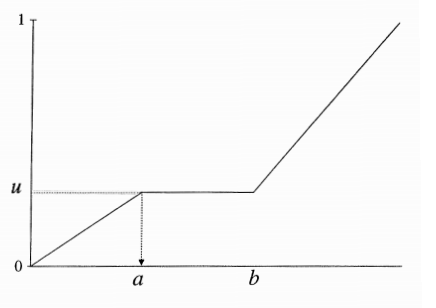
Observe que en el intervalo $(a,b]$ si $X$ tiene distribución $F$, entonces
$$P(a<X\leq b)=F(b)-F(a)=0\longrightarrow \text{secciones planas}$$

Por lo tanto si $F$ tienen una densidad continua, entonces $F$ es estrictamente creciente y su inversa está bien definida. 


Ahora observemos cuando se tienen las siguientes funciones:
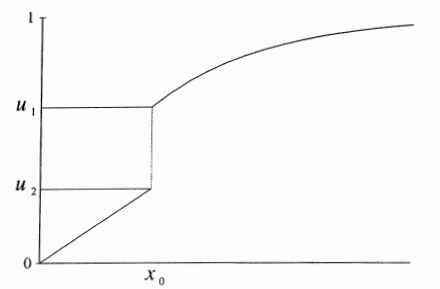
Observemos que sucede en $x_0$
$$\lim_{x \to x_0^-} F(x)\equiv F(x^-)<F(x^+)\equiv \lim_{x\to x_0^+}F(x)$$
Bajo esta distribución el resultado $x_0$ tiene probabilidad $F(x^+)-F(x^-)$. Por otro lado todos los valores de $u$ entre $[u_2,u_1]$ serán mapeados a $x_0$.

Los siguientes ejemplos mostrarán una implementación directa de este método.

### Ejemplo 1: Distribución exponencial
La distribución exponencial con media $\theta$ tiene distribución 
$$F(x)=1-e^{-x/\theta}, \quad x\geq 0$$
> Distrubución exponencial python: https://en.wikipedia.org/wiki/Exponential_distribution

In [2]:
# Importamos las librerías principales
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Creamos la función que crea muestras distribuidas exponencialmente
def D_exponential(theta,N):
    return -np.log(np.random.random(N))*theta

3.99781205625


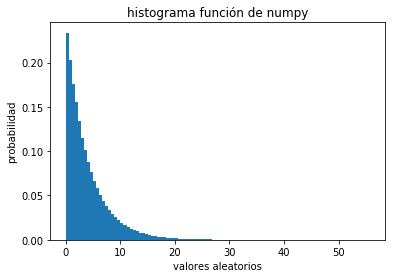

In [5]:
theta = 4 # Media
N = 10**6 # Número de muestras
# creamos muestras exponenciales con la función que esta en numpy
x = np.random.exponential(theta,N) 
# creamos muestras exponenciales con la función creada
x2 = D_exponential(theta,N)
# Graficamos el historial para x
plt.hist(x,100,normed=True)
plt.xlabel('valores aleatorios')
plt.ylabel('probabilidad')
plt.title('histograma función de numpy')
print(np.mean(x))
plt.show()

4.0045616193


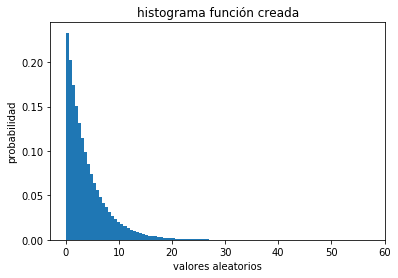

In [7]:
plt.hist(x2,100,normed=True)
plt.xlabel('valores aleatorios')
plt.ylabel('probabilidad')
plt.title('histograma función creada')
print(np.mean(x2))
plt.show()

### Ejemplo 2
Se sabe que la distribución Erlang resulta de la suma de $k$ variables distribuidas exponencialmente cada una con media $\theta$, y por lo tanto esta variable resultante tiene distribución Erlang de tamaño $k$ y media $theta$.

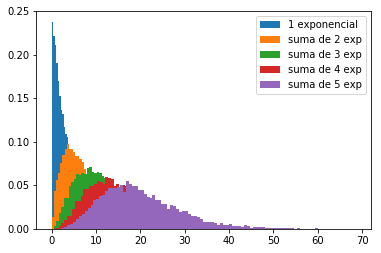

In [71]:
N = 10**4
# Variables exponenciales
x1 = np.random.exponential(4,N)
x2 = np.random.exponential(4,N)
x3 = np.random.exponential(4,N)
x4 = np.random.exponential(4,N)
x5 = np.random.exponential(4,N)

# Variables erlang
e0 = np.random.exponential(4,N)
e1 = (x1+x2)
e2 = (x3+x4+x5)
e3 = (x1+x2+x3+x4)
e4 = x1+x2+x3+x4+x5
plt.hist(e0,100,normed=True,label='1 exponencial')
plt.hist(e1,100,normed=True,label='suma de 2 exp')
plt.hist(e2,100,normed=True,label='suma de 3 exp')
plt.hist(e3,100,normed=True,label='suma de 4 exp')
plt.hist(e4,100,normed=True,label='suma de 5 exp')
plt.legend()

plt.show()

In [7]:
# Función para crear variables aleatorias Erlang
def D_erlang(theta,k,N):
    y = [] 
    f = np.random.rand(N,k)  # Matriz de variables aleatorias de dim N*k mejora la velocidad del algoritmo
    for i in range(N):
        y.append(-(theta)*np.log(np.prod(f[i,:])))
    return y

### Función de densidad variables Erlang

$$p(x)=x^{k-1}\frac{e^{-x/\theta}}{\theta^k\Gamma(k)}\equiv x^{k-1}\frac{e^{-x/\theta}}{\theta^k(k-1)!}$$

In [4]:
#Librería que tiene la función gamma y factorial 
import scipy.special as sps 
from math import factorial as fac
x = np.arange(0,40,0.01)
y = x**(k-1)*(np.exp(-x/theta) /(sps.gamma(k)*theta**k))
y2 = x**(k-1)*(np.exp(-x/theta) /(fac(k-1)*theta**k))
plt.plot(x,y,'r')
plt.plot(x,y2,'b--')
plt.show()

NameError: name 'k' is not defined

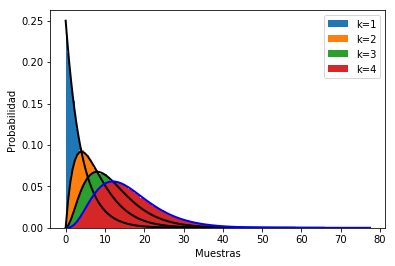

In [10]:
theta = 4    # media 
N = 10**5   # Número de muestras
plt.figure(1)
y = D_erlang(theta,1,N)
y2 = D_erlang(theta,2,N)
y3 = D_erlang(theta,3,N)
y4 = D_erlang(theta,4,N)
sps.gamma
####################### historial y
count, x, ignored = plt.hist(y,100,normed=True,label='k=1')
k = 1  
y = x**(k-1)*(np.exp(-x/theta) /(sps.gamma(k)*theta**k))
plt.plot(x, y, linewidth=2,color='k')
######################## historial y2
count, x, ignored = plt.hist(y2,100,normed=True,label='k=2')
k = 2  
y = x**(k-1)*(np.exp(-x/theta) /(sps.gamma(k)*theta**k))
plt.plot(x, y, linewidth=2,color='k')
######################## historial y3
count, x, ignored = plt.hist(y3,100,normed=True,label='k=3')
k = 3  
y = x**(k-1)*(np.exp(-x/theta) /(sps.gamma(k)*theta**k))
plt.plot(x, y, linewidth=2,color='k')
######################## historial y4
count, x, ignored = plt.hist(y4,100,normed=True,label='k=4')
k = 4
y = x**(k-1)*(np.exp(-x/theta) /(sps.gamma(k)*theta**k))
plt.plot(x, y, linewidth=2,color='b')

plt.ylabel('Probabilidad')
plt.xlabel('Muestras')
plt.legend()
plt.show()

>### <font color ='red'> Ejemplo 3  **Tarea** 
>El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>

### Ejemplo 4
Distribución de Rayleigh
$$F(x)=1-e^{-2x(x-b)},\quad x\geq b $$

In [19]:
# Función del ejemplo 4
def D_rayleigh(b,N):
    return (b/2)+np.sqrt(b**2-2*np.log(np.random.rand(N)))/2
# Función de Raylegh que contiene numpy
def D_rayleigh2(sigma,N):
    return np.sqrt(-2*sigma**2*np.log(np.random.rand(N)))

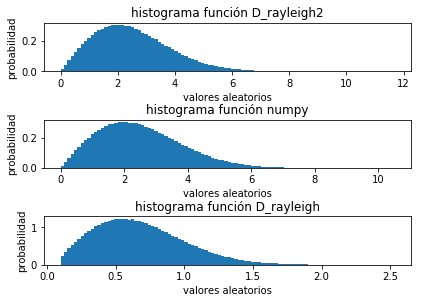

In [27]:
b = .1; N =10**6;sigma = 2
r = D_rayleigh(b,N)              # Función del ejemplo 
r2 = np.random.rayleigh(sigma,N) # Función que contiene python
r3 = D_rayleigh2(sigma,N)        # Función creada de acurdo a la función de python

plt.subplot(311)
plt.hist(r3,100,normed=True)
plt.xlabel('valores aleatorios')
plt.ylabel('probabilidad')
plt.title('histograma función D_rayleigh2')

plt.subplot(312)
plt.hist(r2,100,normed=True)
plt.xlabel('valores aleatorios')
plt.ylabel('probabilidad')
plt.title('histograma función numpy')

plt.subplot(313)
plt.hist(r,100,normed=True)
plt.xlabel('valores aleatorios')
plt.ylabel('probabilidad')
plt.title('histograma función D_rayleigh')
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95,
                    hspace=1,wspace=2)
plt.show()

## Distribuciones discretas

Para una variable dicreta, evaluar $F^{-1}$ se reduce a buscar en una tabla. Considere por ejemplo una variable aleatoria discreta, cuyos posibles valores son $c_1<c_2<\cdots<c_n$. Tome $p_i$ la probabilidad alcanzada por $c_i$, $i=1,\cdots,n$ y tome $q_0=0$, en donde $q_i$ representa las **probabilidades acumuladas asociadas con $c_i$** y está definido como:
$$q_i=\sum_{j=1}^{i}p_j,\quad i=1,\cdots,n \longrightarrow q_i=F(c_i)$$
Entonces, para tomar muestras de esta distribución se deben de realizar los siguientes pasos:
   1. Generar un número uniforme $U$ entre (0,1).
   2. Encontrar $k\in\{1,\cdots,n\}$ tal que $q_{k-1}<U\leq q_k$
   3. Tomar $X=c_k$.

### Ejemplo numérico

In [5]:
# Librería para crear tablas
import pandas as pd

In [35]:
val    = [1,2,3,4,5]
p_ocur = [.1,.2,.4,.2,.1]
p_acum = np.cumsum(p_ocur)

df = pd.DataFrame(index=val,columns=['Probabilidades','Probabilidad acumulada'], dtype='float')
df.index.name = "Valores (índices)"
df.loc[val,'Probabilidades'] = p_ocur
df.loc[val,'Probabilidad acumulada'] = p_acum
df

,Probabilidades,Probabilidad acumulada
Valores (índices),,
1,0.1,0.1
2,0.2,0.3
3,0.4,0.7
4,0.2,0.9
5,0.1,1.0


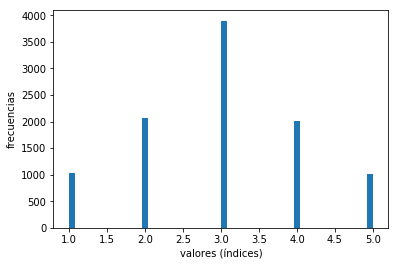

In [38]:
N = 10**4 
v = []
for j in range(N):
    u =np.random.rand(1)
    v.append(sum(1 for i in p_acum if i<u)+1)#+1 porque los índices comienzan en 1
plt.hist(v,50,normed=False)
plt.xlabel('valores (índices)')
plt.ylabel('frecuencias')
plt.show()

### Ejemplo binomial: 
Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que
$$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
<font color ='blue'> Mostrar en el tablero la validez de la siguiente ecuación</font>
>$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i \longrightarrow \text{Hablar de las ventajas que sea recursiva}$$

**El Algoritmo que debemos realizar:**
   1. Generar $U$.
   2. Si $U<p_0$, poner $X=0$ y detenerse.
   3. Si $p_0<U<p_0+p_1$, poner $X=1$ y detenerse.
   $$ \vdots$$
   4. Si $p_0+\cdots+p_{n-1}<U<p_0+\cdots+p_{n}$, poner $X=n$ y detenerse.

In [3]:
def D_binomial(n,p,N):
    c = p/(1-p)
    X = []
    for j in range(N):
        pr = (1-p)**n
        F=pr
        u = np.random.rand(1)
        for i in range(n+1):
            if u<F:
                X.append(i)
                break
            else:
                pr = (c*(n-i)/(i+1))*pr
                F = F+pr
    return X

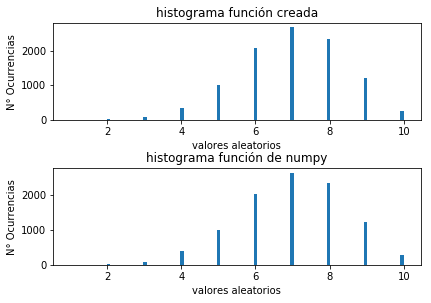

In [6]:
# parámetros de la distribución
n = 10; p = 0.7; N = 10**4

B = D_binomial(n,p,N)
B2 = np.random.binomial(n,p,N)

plt.subplot(211)
plt.hist(B,100,normed=False)
plt.xlabel('valores aleatorios')
plt.ylabel('N° Ocurrencias')
plt.title('histograma función creada')

plt.subplot(212)
plt.hist(B2,100,normed=False)
plt.xlabel('valores aleatorios')
plt.ylabel('N° Ocurrencias')
plt.title('histograma función de numpy')
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95,
                    hspace=.5,wspace=.5)
plt.show()


## Método de aceptación rechazo

Este método surgió debido a que muchas distribuciones continuas, no es factible aplicar el método de transformación inversa porque $x= F^{-1}(U)$ no se puede calcular (o al menos no es computacionalmente eficientemente).Con frecuencia, estos métodos son considerablemente más rápidos que el método de transformación inversa, incluso cuando se puede utilizar el último método. Ahora ilustramos el **método de
aceptación y rechazo** en un ejemplo simple.

Suponga que tenemos una función de densidad de probabilidad (PDF) de una distribución beta, la cual viene dada:
$$f(x)=\frac{x^{\alpha_1-1}(1-x)^{\alpha_2-1}}{B(\alpha_1,\alpha_2)} \quad x\in[0,1] \longrightarrow B(\alpha_1,\alpha_2)\equiv \int_{0}^{1}x^{\alpha_1-1}(1-x)^{\alpha_2-1}, \ \alpha_1,\alpha_2>1$$

**Hablar de las desventajas**

Ahora definiremos formalmente el método:

*Note que $f(x)$ debe ser una función acotada y con rango finito* $a\leq x \leq b$ como se muestra a continuación:
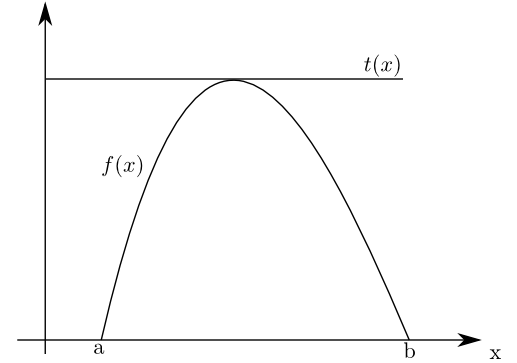

De acuerdo a esta función $f(x)$ este método propone los siguientes pasos. Asuma que podemos encontrar una función $t(x)$ tal que
$$t(x)\geq f(x), \quad \forall x$$
Note que la función $t(x)$  no es una PDF pero esta relacionado con la función $g(x)=t(x)/c \rightarrow g(x)$ **es una densidad**. Resultando entonces 
$$\frac{f(x)}{g(x)}\leq c,\quad \forall x$$
El siguiente algoritmo genera una variable aleatoria $X$, distribuida de acuerdo a la densidad $f(x)$
   1. Generar dos números uniformes $R_1,R_2$.
   2. Determinar el valor de la variable aleatoria $X$ de acuerdo a la siguiente relación lineal de $R_1$
   $$X=a+(b-a)R_1  \sim U(a,b)$$
   3. Evaluar la función de probabilidad en $X=a+(b-a)R_1$
   4. Determinar si la siguiente desigualdad se cumple: $$R_2\leq \frac{f(X)}{t(X)}$$
   Si la respuesta es afirmativa se utiliza $X=a+(b-a)R_1$, de lo contrario es necesario pasar nuevamente al paso 1, tantas veces como sea necesario.

> Se puede demostrar que la $P(aceptar)=1/c$

### Ejemplo 1: Función beta

$$f(x; a,b) = \frac{1}{B(\alpha, \beta)} x^{\alpha - 1}
                                                 (1 - x)^{\beta - 1}$$

###  a). Caso particular: $\alpha=\beta=3$
Con estos valores la PDF es 
$$f(x)=30(x^2-2x^3+x^4)$$

In [6]:
# Librería de optimización 
from scipy import optimize
from scipy.stats import beta

In [ ]:
# Escribir la función acá





###  b). Caso general: $\alpha,\beta>0$ 

El máximo de la función es: 3.5848168690361635


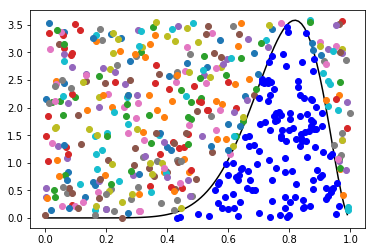

In [157]:
# Parámetros de la función beta
a =10; b=3
N = 500  # número de puntos
# Función objetivo
f = lambda x: beta.pdf(x,a,b)
x = np.arange(0,1,0.01)
plt.plot(x,f(x),'k')
c = float(f(optimize.fmin(lambda x:-f(x),0,disp=False)))
print('El máximo de la función es:',c)
for i in range(N):
    u1 = np.random.rand(1)
    u2 = np.random.uniform(0,c,1)
    if u2 <= f(u1):
        plt.plot(u1,u2,'ob')
    else:
        plt.plot(u1,u2,'o')
plt.show()

### Ejemplo 2.
Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$

El máximo de la función es: 2.109375


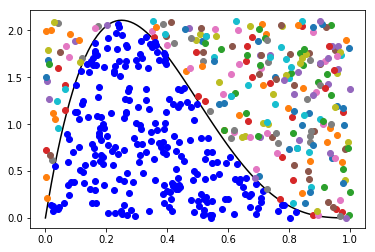

In [8]:
N = 500
f = lambda x: 20*x*(1-x)**3
c = f(float(optimize.fmin(lambda x:-f(x),0, disp=False)))
x = np.arange(0,1,0.01)
plt.plot(x,f(x),'k')
print('El máximo de la función es:',c)
for i in range(N):
    u1 = np.random.rand(1)
    u2 = np.random.uniform(0,c,1)
    if u2 <= f(u1):
        plt.plot(u1,u2,'ob')
    else:
        plt.plot(u1,u2,'o')
plt.show()

# <font color='red'> Tarea </font>
Generar números al azar que sigan la siguiente distribución:

$$f(x)=\begin{cases}\frac{2}{c-a)(b-a)}(x-a), & a\leq x \leq b\\ \frac{-2}{(c-a)(c-b)}(x-c),& b\leq x \leq c \end{cases}$$

>Entregar la solución a este ejercicio en moodle donde se habilitará un lugar para subir el archiv de python con la solución.